# Imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
import sklearn.model_selection, sklearn.metrics, sklearn.neighbors
import time
import random

# Load Data

In [11]:
data = np.load('data.npy', allow_pickle=True)

dict = {}
for i in range(len(data)):
    dict[data[i][3]] = (dict[data[i][3]] + 1) if data[i][3] in dict else 1

l = list(dict.items())

# Exploratory Data Analysis

['sleep', 'oven', 'chair', 'igloo', 'fish', 'fishing', 'radio', 'flute', 'tank', 'keyboard', 'notebook', 'key', 'sweater', 'love', 'pillow', 'laptop', 'sad', 'cow', 'stairs', 'book', 'clock', 'hammer', 'mouse', 'call', 'hard', 'pant', 'gym', 'hit', 'bucket', 'knife', 'cigarette', 'rain', 'snake', 'comb', 'catch', 'tree', 'brush', 'butterfly', 'cry', 'slide', 'calculator', 'telephone', 'rainy', 'wheel', 'cook', 'bee', 'ambulance', 'drive', 'lantern', 'giraffe', 'badminton', 'bicycle', 'sword', 'bullet', 'microwave', 'airplane', 'pencil', 'bird', 'stove', 'starfish', 'truck', 'spoon', 'plant', 'television', 'pear', 'candle', 'eraser', 'sun', 'lizard', 'puppy', 'parachute', 'ladder', 'car', 'arrow', 'close', 'ant', 'helicopter', 'bench', 'suitcase', 'calendar', 'toothpaste', 'climb', 'teaspoon', 'swim', 'far', 'needle', 'table', 'basketball', 'fruit', 'clap', 'van', 'sing', 'baseball', 'spiderman', 'mug', 'finger', 'dragonfly', 'toothbrush', 'loudspeaker', 'cat', 'shark', 'roof', 'deer', 

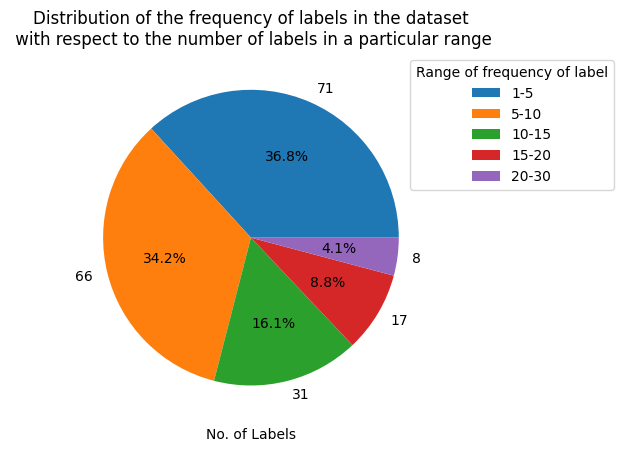

In [12]:
x = [i[0] for i in l]
y = [i[1] for i in l]

print(x)
print(y)

y = np.array(y)
z = []
z.append(np.count_nonzero(y < 5))
z.append(np.count_nonzero((y >= 5) & (y < 10)))
z.append(np.count_nonzero((y >= 10) & (y < 15)))
z.append(np.count_nonzero((y >= 15) & (y < 20)))
z.append(np.count_nonzero((y >= 20) & (y < 30)))

plt.title('Distribution of the frequency of labels in the dataset\n with respect to the number of labels in a particular range')
plt.xlabel('No. of Labels')
plt.pie(z, autopct='%1.1f%%', labels=z)
plt.legend(['1-5', '5-10', '10-15', '15-20', '20-30'], loc='upper right', title='Range of frequency of label', bbox_to_anchor=(1.5, 1))

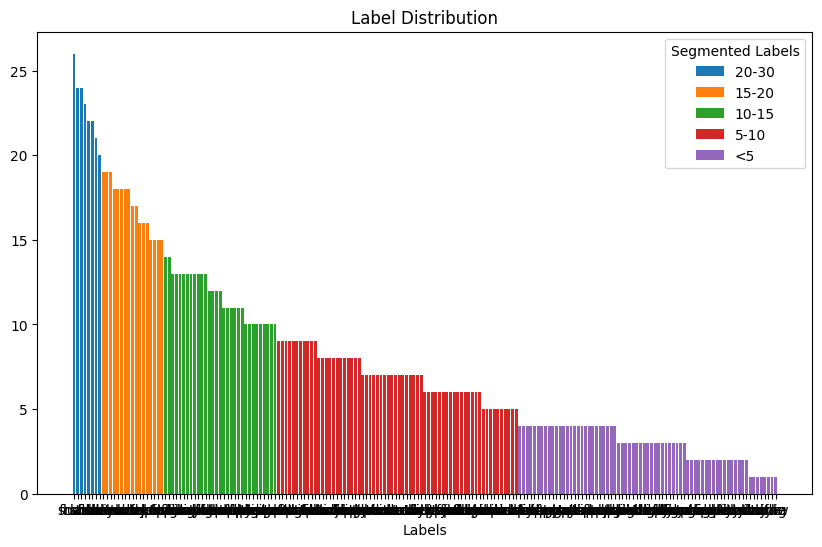

In [13]:
pair = list(zip(x, y))
for i in range(len(pair)):
    pair[i] = list(pair[i])
arr_sorted = sorted(pair, key=lambda x: x[1], reverse=True)

segmented_labels = []
segmented_labels.append([i[0] for i in arr_sorted if i[1] >= 20 and i[1] < 30])
segmented_labels.append([i[0] for i in arr_sorted if i[1] >= 15 and i[1] < 20])
segmented_labels.append([i[0] for i in arr_sorted if i[1] >= 10 and i[1] < 15])
segmented_labels.append([i[0] for i in arr_sorted if i[1] >= 5 and i[1] < 10])
segmented_labels.append([i[0] for i in arr_sorted if i[1] < 5])

plt.figure(figsize=(10,6))
for i in range(len(segmented_labels)):
    plt.bar(segmented_labels[i], [dict[j] for j in segmented_labels[i]])
    plt.xlabel('Labels')
plt.title('Label Distribution')
plt.legend(['20-30', '15-20', '10-15', '5-10', '<5'], loc='upper right', title='Segmented Labels')

In [14]:
for i in segmented_labels:
    print(i)

['flute', 'snake', 'sun', 'candle', 'fish', 'ladder', 'chair', 'tree']
['key', 'hammer', 'door', 'love', 'butterfly', 'boat', 'shoe', 'rose', 'clock', 'wheel', 'bucket', 'arrow', 'table', 'laptop', 'mouse', 'knife', 'pizza']
['radio', 'stairs', 'fishing', 'pillow', 'cow', 'rain', 'brush', 'giraffe', 'bullet', 'mug', 'elephant', 'bed', 'keyboard', 'car', 'toothbrush', 'shark', 'telephone', 'smile', 'happy', 'earth', 'face', 'fork', 'comb', 'badminton', 'spoon', 'toothpaste', 'basket', 'peacock', 'grass', 'tomato', 'tent']
['pant', 'cigarette', 'calculator', 'ambulance', 'pencil', 'finger', 'deer', 'zip', 'potato', 'fire', 'windmill', 'notebook', 'sad', 'book', 'stove', 'television', 'helicopter', 'swim', 'basketball', 'clap', 'forest', 'jacket', 'feather', 'sweater', 'gym', 'bee', 'sword', 'bird', 'plant', 'parachute', 'ant', 'suitcase', 'van', 'cat', 'roof', 'camera', 'saturn', 'carrot', 'fly', 'monkey', 'sleep', 'hit', 'bicycle', 'airplane', 'starfish', 'lizard', 'bench', 'fruit', 'du

## Conclusion

The following labels have a frequency of >= 10 :
* `flute, snake, sun, candle, fish, ladder, chair, tree, key, hammer, door, love, butterfly, boat, shoe, rose, clock, wheel, bucket, arrow, table, laptop, mouse, knife, pizza, radio, stairs, fishing, pillow, cow, rain, brush, giraffe, bullet, mug, elephant, bed, keyboard, car, toothbrush, shark, telephone, smile, happy, earth, face, fork, comb, badminton, spoon, toothpaste, basket, peacock, grass, tomato, tent, pant, cigarette, calculator, ambulance, pencil, finger, deer, zip, potato, fire, windmill, notebook, sad, book, stove, television, helicopter, swim, basketball, clap, forest, jacket, feather, sweater, gym, bee, sword, bird, plant, parachute, ant, suitcase, van, cat, roof, camera, saturn, carrot, fly, monkey, sleep, hit, bicycle, airplane, starfish, lizard, bench, fruit, dustbin, walk, lake, panda, enter, flame, drink, email, igloo, tank, truck, eraser, calendar, spiderman, spider, screwdriver, eat, crocodile`

- Therefore, the above labels have a decent frequency in the data & may be used for training the KNN model

However, the following labels have a frequency of < 10 :
* `pant, cigarette, calculator, ambulance, pencil, finger, deer, zip, potato, fire, windmill, notebook, sad, book, stove, television, helicopter, swim, basketball, clap, forest, jacket, feather, sweater, gym, bee, sword, bird, plant, parachute, ant, suitcase, van, cat, roof, camera, saturn, carrot, fly, monkey, sleep, hit, bicycle, airplane, starfish, lizard, bench, fruit, dustbin, walk, lake, panda, enter, flame, drink, email, igloo, tank, truck, eraser, calendar, spiderman, spider, screwdriver, eat, crocodile, catch, cry, slide, drive, lantern, puppy, teaspoon, far, baseball, cut, angry, tattoo, grape, toaster, envelope, postcard, paint, passport, dive, sunny, run, feet, clean, hang, pull, kiss, puppet, call, hard, cook, climb, needle, dragonfly, paintbrush, download, length, bend, scissor, bury, selfie, frog, pray, burn, scream, listen, beetle, oven, microwave, pear, close, sing, loudspeaker, fight, goldfish, ape, buy, sit, skate, lazy, recycle, bear, exit, brick, rainy, scary, knit, knock, throne, rifle, draw, dig`

- So, the above labels are repeated very few times in the data & hence should not be used for training purposes.

* We notice from the 2 graphs above that the frequency v/s no. of samples in the data is not in good proportion, i.e. there are more labels with lesser frequency than vice-versa

* Hence, the given dataset is not a good training dataset.

# KNN Implementation

In [15]:
# A K-Nearest Neighbours Classifier implementation
class KNN_Classifier:
    def __init__(self, encoder, k, distance_metric):
        if (encoder != 'resnet' and encoder != 'vit'):
            print("Encoder must be 'resnet' or 'vit'")
            return
        elif encoder == 'resnet':
            encoder = 1
        else:
            encoder = 2

        if (distance_metric != 'l1' and distance_metric != 'l2' and distance_metric != 'cosine'):
            print("Distance metric must be 'l1', 'l2' or 'cosine'")
            return
        elif distance_metric == 'l1':
            distance_metric = self.L1_distance
        elif distance_metric == 'l2':
            distance_metric = self.L2_distance
        else:
            distance_metric = self.cosine_similarity
            
        self.encoder = encoder
        self.k = k
        self.distance_metric = distance_metric

    # Calculates Manhattan Distance
    def L1_distance(self, x, y):
        return np.sum(np.abs(x - y))

    # Calculates Euclidean Distance
    def L2_distance(self, x, y):
        return np.sqrt(np.sum(np.square(x - y)))

    # Calculates 1 - Cosine Similarity
    def cosine_similarity(self, x, y):
        return 1 - (np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)))

    # Shows the given parameters
    def show(self):
        print(self.encoder, self.k, self.distance_metric)

    def calculate_distance(self, x, y):
        dist = []
        for i in range(len(y)):
            dist.append([self.distance_metric(x[self.encoder][0], y[i][self.encoder][0]), i])
        
        return dist

    # Predicts the label of the given image data
    def pred(self, x, y, dist):
        ksmallest = heapq.nsmallest(self.k, dist, key=lambda x: x[0])
        labels = {}
        for i in ksmallest:
            labels[y[i[1]][3]] = (labels[y[i[1]][3]] + 1) if y[i[1]][3] in labels else 1
        prediction = max(labels, key=labels.get)
        
        return prediction
    
    # Calculates the accuracy, precision, recall and f1-score of the model on a given train-validation split
    def scores(self, X_train, y_train, X_valid, y_valid):
        y_pred = []
        for i in range(len(X_valid)):
            y_pred.append(self.pred(X_valid[i], X_train, self.calculate_distance(X_valid[i], X_train)))
        accuracy = sklearn.metrics.accuracy_score(y_valid, y_pred)
        precision = sklearn.metrics.precision_score(y_valid, y_pred, average='weighted', zero_division=np.nan)
        recall = sklearn.metrics.recall_score(y_valid, y_pred, average='weighted', zero_division=np.nan)
        f1_score = sklearn.metrics.f1_score(y_valid, y_pred, average='weighted')

        return accuracy, precision, recall, f1_score

# Hyperparameter Testing

In [16]:
# Getting most optimum data split
new_datalabels = [[[j for i in range(dict[j])] for j in k] for k in segmented_labels]
# print(len(new_datalabels[0][0][0][0][0]))
label_order = []
for i in new_datalabels:
    for j in i:
        for k in j:
            label_order.append(k)

In [17]:
# Testing for best values of embedding type, k and distance metric
best_accuracy = 0
best_encoder = ''
best_k = 0
best_distance_metric = ''

k_range = range(1, int(np.sqrt(len(data) * 0.8)) + 1)

heap = []

# X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(data, np.array([i[3] for i in data]), test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = data[:1200], data[1200:], np.array([i[3] for i in data[:1200]]), np.array([i[3] for i in data[1200:]])

for encoder in ['resnet', 'vit']:
    for k in k_range:
        for distance_metric in ['l1', 'l2', 'cosine']:
            knn = Best_KNN_Classifier(encoder, k, distance_metric)
            scores = knn.scores(X_train, y_train, X_valid, y_valid)

            if (scores[0] > best_accuracy):
                best_accuracy = scores[0]
                best_encoder = encoder
                best_k = k
                best_distance_metric = distance_metric
            heap.append([scores[0], encoder, k, distance_metric])

print("Best accuracy: ", best_accuracy)
print("Best encoder: ", best_encoder)
print("Best k: ", best_k)
print("Best distance metric: ", best_distance_metric)

Best accuracy:  0.31333333333333335
Best encoder:  vit
Best k:  10
Best distance metric:  l2


In [18]:
# Ordered rank list of top 20 triplet parameters
top20 = heapq.nlargest(20, heap, key=lambda x: x[0])
print("Top 20 accuracy, encoder, k, distance_metric: ")
for i in range(len(top20)):
    print(str(i+1) + ": ", top20[i][1:], "Accuracy = " + str(top20[i][0]))

Top 20 accuracy, encoder, k, distance_metric: 
1:  ['vit', 10, 'l2'] Accuracy = 0.31333333333333335
2:  ['vit', 9, 'l2'] Accuracy = 0.31
3:  ['vit', 8, 'l2'] Accuracy = 0.30666666666666664
4:  ['vit', 8, 'l1'] Accuracy = 0.30333333333333334
5:  ['vit', 9, 'l1'] Accuracy = 0.30333333333333334
6:  ['vit', 7, 'l1'] Accuracy = 0.3
7:  ['vit', 11, 'l2'] Accuracy = 0.3
8:  ['vit', 13, 'l1'] Accuracy = 0.3
9:  ['vit', 14, 'l1'] Accuracy = 0.3
10:  ['vit', 17, 'l1'] Accuracy = 0.3
11:  ['vit', 6, 'l1'] Accuracy = 0.2966666666666667
12:  ['vit', 9, 'cosine'] Accuracy = 0.2966666666666667
13:  ['vit', 10, 'l1'] Accuracy = 0.2966666666666667
14:  ['vit', 11, 'l1'] Accuracy = 0.2966666666666667
15:  ['vit', 14, 'l2'] Accuracy = 0.2966666666666667
16:  ['vit', 15, 'l1'] Accuracy = 0.2966666666666667
17:  ['vit', 18, 'l1'] Accuracy = 0.2966666666666667
18:  ['vit', 12, 'l2'] Accuracy = 0.29333333333333333
19:  ['vit', 13, 'l2'] Accuracy = 0.29333333333333333
20:  ['vit', 15, 'l2'] Accuracy = 0.29333

In [19]:
x = [i for i in k_range]
y = []
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(data, np.array([i[3] for i in data]), test_size=0.2, random_state=0)
for k in k_range:
    knn = Best_KNN_Classifier("vit", k, "cosine")
    scores = knn.scores(X_train, y_train, X_valid, y_valid)
    y.append(scores[0])

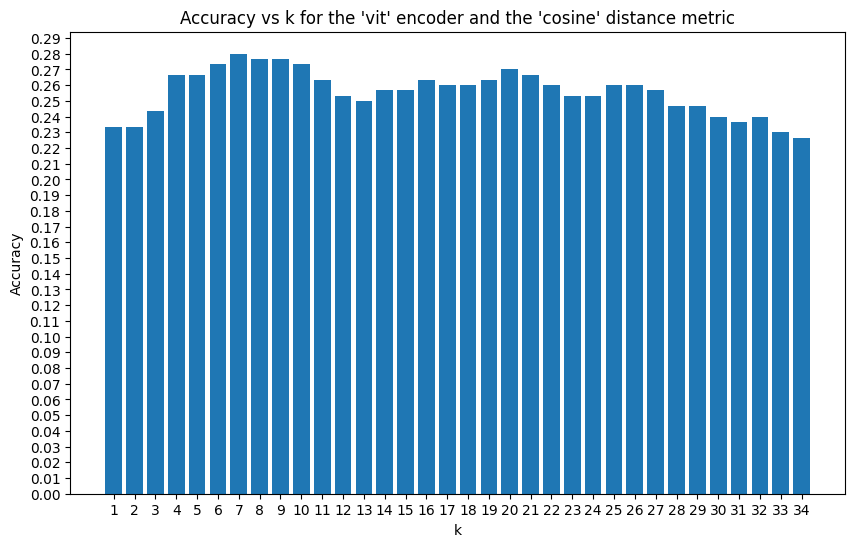

In [20]:
plt.figure(figsize=(10,6))
plt.title("Accuracy vs k for the 'vit' encoder and the 'cosine' distance metric")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(x)
plt.yticks(np.arange(0, 0.3, 0.01))
plt.bar(x, y)
plt.show()

# Testing script in python file

# Optimization

In [21]:
# Optimized calculation of distances
class Optimized_KNN_Classifier:
    def __init__(self, encoder, k, distance_metric):
        if (encoder != 'resnet' and encoder != 'vit'):
            print("Encoder must be 'resnet' or 'vit'")
            return
        elif encoder == 'resnet':
            encoder = 1
        else:
            encoder = 2

        if (distance_metric != 'l1' and distance_metric != 'l2' and distance_metric != 'cosine'):
            print("Distance metric must be 'l1', 'l2' or 'cosine'")
            return
        elif distance_metric == 'l1':
            distance_metric = self.L1_distance
        elif distance_metric == 'l2':
            distance_metric = self.L2_distance
        else:
            distance_metric = self.cosine_similarity
            
        self.encoder = encoder
        self.k = k
        self.distance_metric = distance_metric

    # Calculates Manhattan Distance
    def L1_distance(self, x, y):
        return np.sum(np.abs(x - y), axis=1)

    # Calculates Euclidean Distance
    def L2_distance(self, x, y):
        return np.sqrt(np.sum(np.square(x - y), axis=1))

    # Calculates 1 - Cosine Similarity
    def cosine_similarity(self, x, y):
        return 1 - (np.dot(y, x) / (np.linalg.norm(x) * np.linalg.norm(y, axis=1)))

    # Shows the given parameters
    def show(self):
        print(self.encoder, self.k, self.distance_metric)

    # Predicts the label of the given image data
    def pred(self, x, y, dist):
        ksmallest = heapq.nsmallest(self.k, dist, key=lambda x: x[0])
        labels = {}
        for i in ksmallest:
            labels[y[int(i[1])]] = (labels[y[int(i[1])]] + 1) if y[int(i[1])] in labels else 1
        prediction = max(labels, key=labels.get)
        
        return prediction

    # Calculates the distances of the given validation data from the training data
    def calculate_distances(self, X_train, X_valid):
        z = X_train[:, self.encoder]
        trainx = np.array([z[i][0] for i in range(len(z))])
        validx = X_valid[:, self.encoder][j][0]
        dist = np.concatenate((self.distance_metric(validx, trainx).reshape(-1, 1), np.arange(len(trainx), dtype=int).reshape(-1, 1)), axis=1)
        return dist

    # Calculates the accuracy, precision, recall and f1-score of the model on a given train-validation split
    def scores(self, X_train, y_train, X_valid, y_valid):
        y_pred = []
        z = X_train[:, self.encoder]
        trainx = np.array([z[i][0] for i in range(len(z))])
        
        for j in range(len(X_valid)):
            validx = X_valid[:, self.encoder][j][0]
            dist = np.concatenate((self.distance_metric(validx, trainx).reshape(-1, 1), np.arange(len(trainx), dtype=int).reshape(-1, 1)), axis=1)
            y_pred.append(self.pred(X_valid[j], y_train, dist))
        
        accuracy = sklearn.metrics.accuracy_score(y_valid, y_pred)
        precision = sklearn.metrics.precision_score(y_valid, y_pred, average='weighted', zero_division=np.nan)
        recall = sklearn.metrics.recall_score(y_valid, y_pred, average='weighted', zero_division=np.nan)
        f1_score = sklearn.metrics.f1_score(y_valid, y_pred, average='weighted')

        return accuracy, precision, recall, f1_score

In [22]:
# Higher accuracy rate because of tie-breaking
class Best_KNN_Classifier:
    def __init__(self, encoder, k, distance_metric):
        if (encoder != 'resnet' and encoder != 'vit'):
            print("Encoder must be 'resnet' or 'vit'")
            return
        elif encoder == 'resnet':
            encoder = 1
        else:
            encoder = 2

        if (distance_metric != 'l1' and distance_metric != 'l2' and distance_metric != 'cosine'):
            print("Distance metric must be 'l1', 'l2' or 'cosine'")
            return
        elif distance_metric == 'l1':
            distance_metric = self.L1_distance
        elif distance_metric == 'l2':
            distance_metric = self.L2_distance
        else:
            distance_metric = self.cosine_similarity
            
        self.encoder = encoder
        self.k = k
        self.distance_metric = distance_metric

    # Calculates Manhattan Distance
    def L1_distance(self, x, y):
        return np.sum(np.abs(x - y), axis=1)

    # Calculates Euclidean Distance
    def L2_distance(self, x, y):
        return np.sqrt(np.sum(np.square(x - y), axis=1))

    # Calculates 1 - Cosine Similarity
    def cosine_similarity(self, x, y):
        return 1 - (np.dot(y, x).astype(float) / (np.linalg.norm(x) * np.linalg.norm(y, axis=1)).astype(float)).astype(float)

    # Shows the given parameters
    def show(self):
        print(self.encoder, self.k, self.distance_metric)

    # Predicts the label of the given image data
    def pred(self, x, y, dist):
        k = self.k
        ksmallest = heapq.nsmallest(self.k, dist, key=lambda x: x[0])
        labels = {}
        for i in ksmallest:
            labels[y[int(i[1])]] = (labels[y[int(i[1])]] + 1) if y[int(i[1])] in labels else 1

        prediction = max(labels, key=labels.get)
        
        a = np.array([i for i in labels.items()])
        b = [i[0] for i in a if int(i[1]) == int(labels[prediction])]
        if (len(b) != 1):
            c = [[i[0] for i in ksmallest if y[int(i[1])] == j] for j in b]
            c = np.array(c)
            c = np.mean(c, axis=1) # can use mean or max for equivalent results
            smallest = heapq.nsmallest(1, c)
            c = list(c)
            ind = c.index(smallest)
            prediction = b[ind]
                
        return prediction

    # Calculates the distances of the given validation data from the training data
    def calculate_distances(self, X_train, X_valid):
        z = X_train[:, self.encoder]
        trainx = np.array([z[i][0] for i in range(len(z))])
        validx = X_valid[:, self.encoder][j][0]
        dist = np.concatenate((self.distance_metric(validx, trainx).reshape(-1, 1), np.arange(len(trainx), dtype=int).reshape(-1, 1)), axis=1)
        return dist

    # Calculates the accuracy, precision, recall and f1-score of the model on a given train-validation split
    def scores(self, X_train, y_train, X_valid, y_valid):
        y_pred = []
        z = X_train[:, self.encoder]
        trainx = np.array([z[i][0] for i in range(len(z))])
        
        for j in range(len(X_valid)):
            validx = X_valid[:, self.encoder][j][0]
            dist = np.concatenate((self.distance_metric(validx, trainx).reshape(-1, 1), np.arange(len(trainx), dtype=int).reshape(-1, 1)), axis=1)
            y_pred.append(self.pred(X_valid[j], y_train, dist))
        
        accuracy = sklearn.metrics.accuracy_score(y_valid, y_pred)
        precision = sklearn.metrics.precision_score(y_valid, y_pred, average='weighted', zero_division=np.nan)
        recall = sklearn.metrics.recall_score(y_valid, y_pred, average='weighted', zero_division=np.nan)
        f1_score = sklearn.metrics.f1_score(y_valid, y_pred, average='weighted')

        return accuracy, precision, recall, f1_score

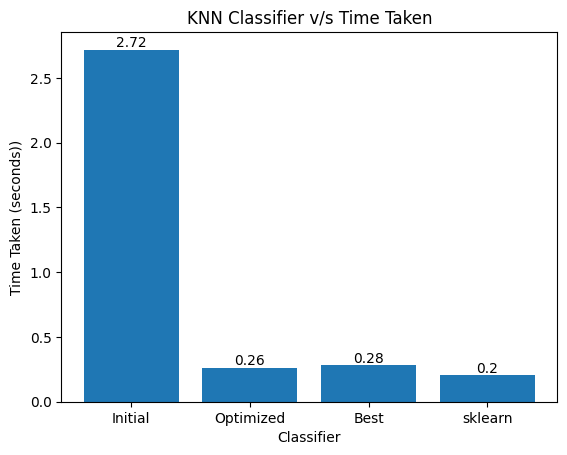

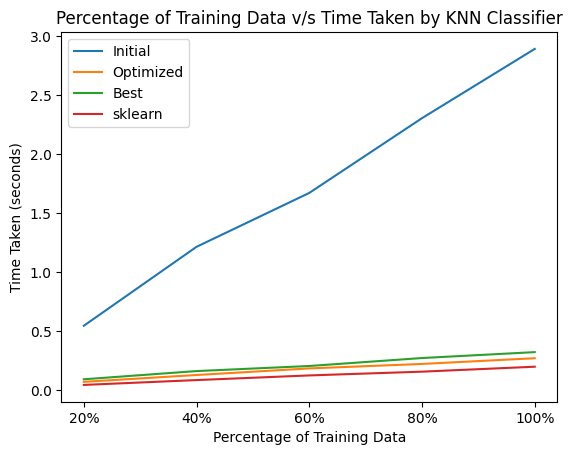

In [23]:
# Plotting inference times for all KNN classifiers

X_train, X_valid, y_train, y_valid = data[:1200], data[1200:], np.array([i[3] for i in data[:1200]]), np.array([i[3] for i in data[1200:]])
# X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(data, np.array([i[3] for i in data]), test_size=0.2, random_state=0)
z = X_train[:, 2]
trainx = np.array([z[i][0] for i in range(len(z))])
z = X_valid[:, 2]
validx = np.array([z[i][0] for i in range(len(z))])

knn = KNN_Classifier("vit", 7, "l2")
optimized_knn = Optimized_KNN_Classifier("vit", 7, "l2")
best_knn = Best_KNN_Classifier("vit", 7, "l2")
sklearn_knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=7, metric='l2')

labels = ['Initial', 'Optimized', 'Best', 'sklearn']
times = []
scores = []

start = time.time()
scores.append(knn.scores(X_train, y_train, X_valid, y_valid)[0])
end = time.time()
times.append(end - start)

start = time.time()
scores.append(optimized_knn.scores(X_train, y_train, X_valid, y_valid)[0])
end = time.time()
times.append(end - start)

start = time.time()
scores.append(best_knn.scores(X_train, y_train, X_valid, y_valid)[0])
end = time.time()
times.append(end - start)

numkeys = list(dict.keys())

y_train = np.array([numkeys.index(i) for i in y_train])
y_valid = np.array([numkeys.index(i) for i in y_valid])

start = time.time()
sklearn_knn.fit(trainx, y_train)
y_pred = sklearn_knn.predict(validx)

accuracy = sklearn.metrics.accuracy_score(y_valid, y_pred)
precision = sklearn.metrics.precision_score(y_valid, y_pred, average='weighted', zero_division=np.nan)
recall = sklearn.metrics.recall_score(y_valid, y_pred, average='weighted', zero_division=np.nan)
f1_score = sklearn.metrics.f1_score(y_valid, y_pred, average='weighted')
scores.append(accuracy)

end = time.time()
times.append(end - start)

plt.xlabel('Classifier')
plt.ylabel('Time Taken (seconds))')
plt.title('KNN Classifier v/s Time Taken')
for i in range(len(labels)):
    plt.text(i, times[i], round(times[i], 2), ha = 'center', va = 'bottom')
plt.bar(labels, times)
plt.show()

# Plotting time taken v/s percentage of training data for all KNN classifiers
times = np.zeros((4, 5))
perc = [0.2, 0.4, 0.6, 0.8, 1]

for i in range(len(perc)):
    X_train, X_valid, y_train, y_valid = data[:1200], data[1200:], np.array([i[3] for i in data[:1200]]), np.array([i[3] for i in data[1200:]])
    
    X_train2 = X_train[0:int(len(X_train)*perc[i] + 1)]
    y_train2 = y_train[0:int(len(y_train)*perc[i] + 1)]

    start = time.time()
    knn.scores(X_train2, y_train2, X_valid, y_valid)
    end = time.time()
    times[0, i] = end - start

    start = time.time()
    optimized_knn.scores(X_train2, y_train2, X_valid, y_valid)
    end = time.time()
    times[1, i] = end - start

    start = time.time()
    best_knn.scores(X_train2, y_train2, X_valid, y_valid)
    end = time.time()
    times[2, i] = end - start

    y_train2 = np.array([numkeys.index(j) for j in y_train2])
    y_valid = np.array([numkeys.index(i) for i in y_valid])

    z = X_train2[:, 2]
    trainx = np.array([z[i][0] for i in range(len(z))])
    z = X_valid[:, 2]
    validx = np.array([z[i][0] for i in range(len(z))])

    start = time.time()
    sklearn_knn.fit(trainx, y_train2)
    y_pred = sklearn_knn.predict(validx)

    sklearn.metrics.accuracy_score(y_valid, y_pred)
    sklearn.metrics.precision_score(y_valid, y_pred, average='weighted', zero_division=np.nan)
    sklearn.metrics.recall_score(y_valid, y_pred, average='weighted', zero_division=np.nan)
    sklearn.metrics.f1_score(y_valid, y_pred, average='weighted')

    end = time.time()
    times[3, i] = end - start

perclabels = ['20%', '40%', '60%', '80%', '100%']

plt.plot(perc, times[0])
plt.plot(perc, times[1])
plt.plot(perc, times[2])
plt.plot(perc, times[3])
plt.xlabel('Percentage of Training Data')
plt.xticks(perc, perclabels)
plt.ylabel('Time Taken (seconds)')
plt.title('Percentage of Training Data v/s Time Taken by KNN Classifier')
plt.legend(labels)
plt.show()

# Decision Trees

## Imports

In [24]:
import numpy as np
import sklearn.tree, sklearn.preprocessing, sklearn.metrics, sklearn.model_selection
from itertools import chain, combinations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import scipy.spatial.distance
from pprint import pprint

data = pd.read_csv('advertisement.csv')

## Data Exploration & Visualization

/home/sarthak/miniconda3/envs/smai/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


                age  gender        income education married     children  \
count   1000.000000    1000   1000.000000      1000    1000  1000.000000   
unique          NaN       2           NaN         4       2          NaN   
top             NaN  Female           NaN    Master   False          NaN   
freq            NaN     506           NaN       269     510          NaN   
mean      40.836000     NaN  49349.796167       NaN     NaN     1.508000   
std       13.786848     NaN   9894.479148       NaN     NaN     1.129253   
min       18.000000     NaN  21908.867759       NaN     NaN     0.000000   
25%       28.000000     NaN  42577.352034       NaN     NaN     0.000000   
50%       41.000000     NaN  48993.757137       NaN     NaN     1.000000   
75%       53.000000     NaN  56566.795992       NaN     NaN     3.000000   
max       64.000000     NaN  79459.294416       NaN     NaN     3.000000   

               city occupation  purchase_amount most bought item  labels  
count       

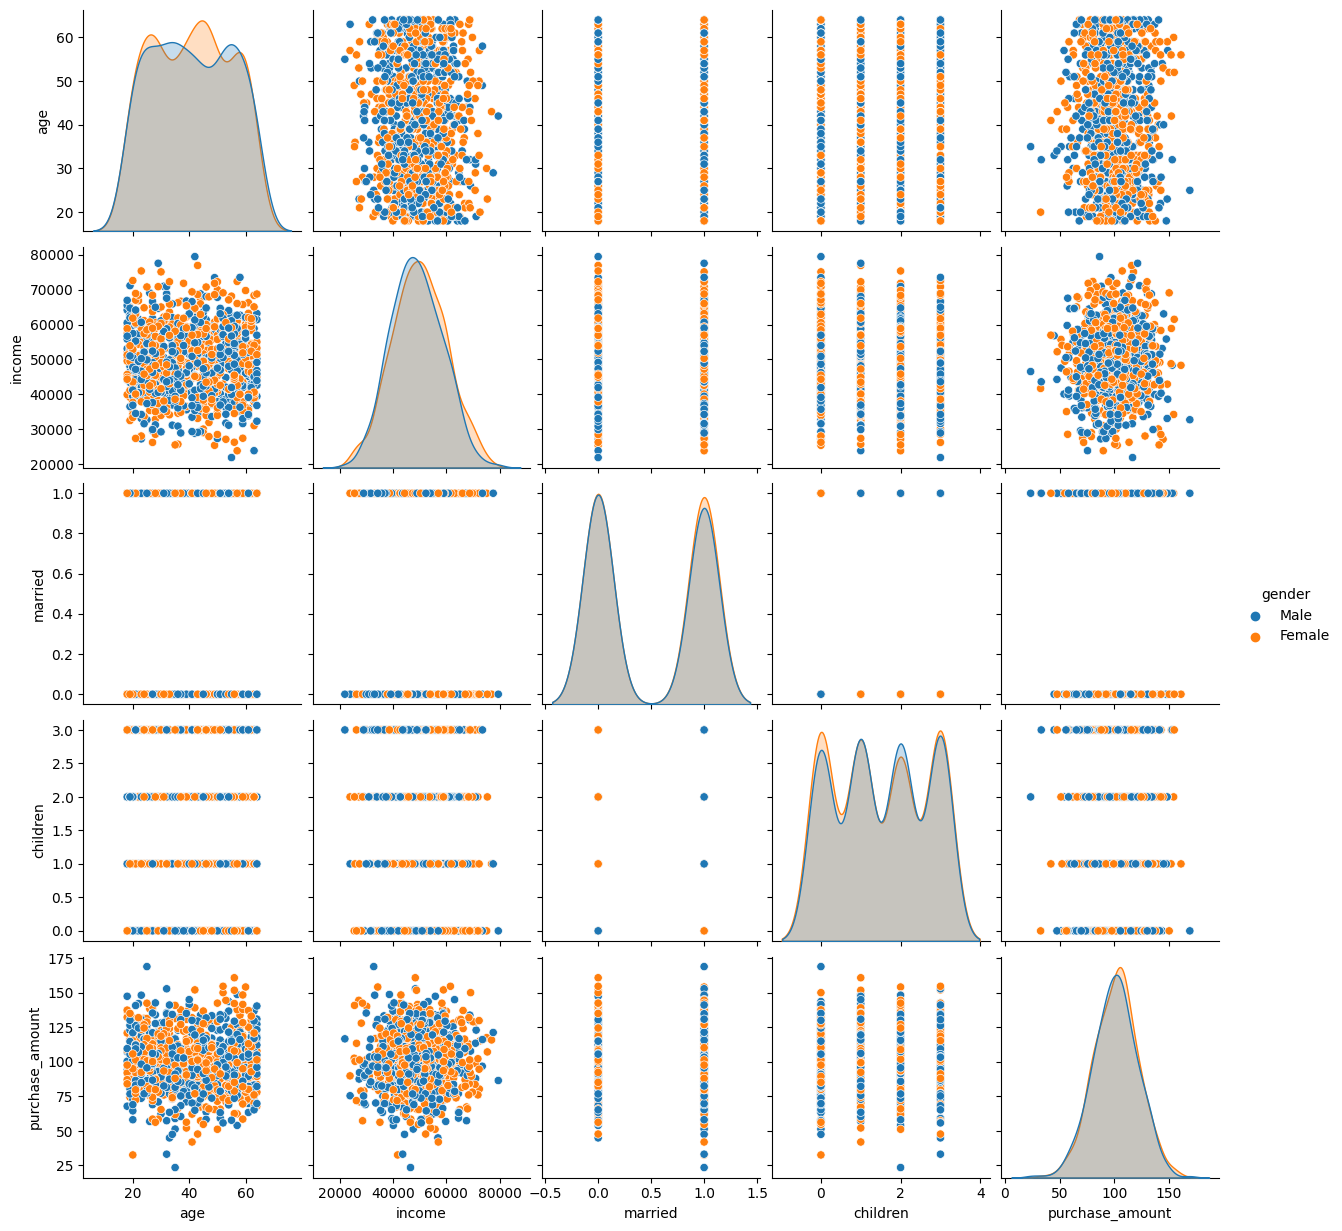

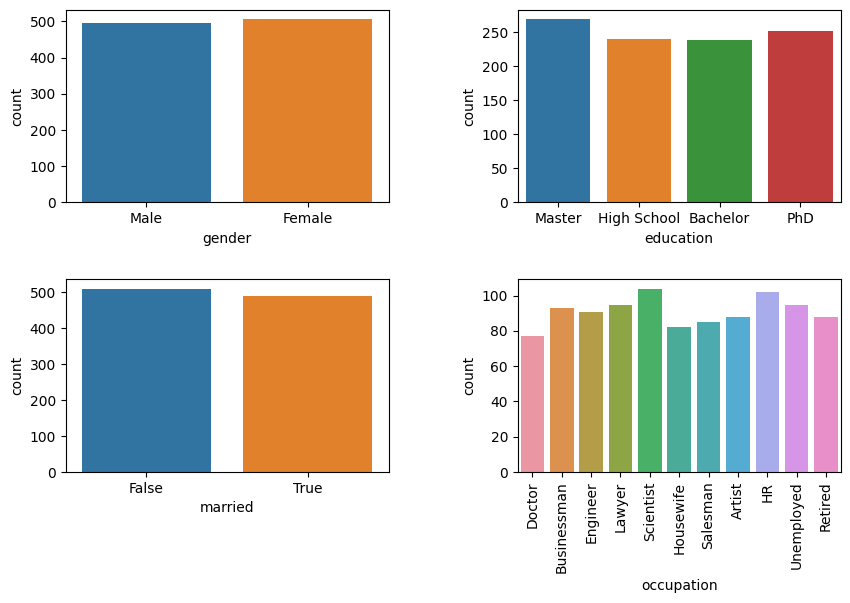

In [25]:
seaborn.pairplot(data, hue="gender")
print(data.describe(include='all'))

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
seaborn.countplot(x = data["gender"], ax=ax)
ax = fig.add_subplot(2, 2, 2)
seaborn.countplot(x = data["education"], ax=ax)
ax = fig.add_subplot(2, 2, 3)
seaborn.countplot(x = data["married"], ax=ax)
ax = fig.add_subplot(2, 2, 4)
seaborn.countplot(x = data["occupation"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Conclusion
* Looking at the scatter plots, line graphs and bar charts, we can say that the `data is evenly balanced` about all the parameters i.e. columns.
* The no. of unique cities is 969 out of 1000 and the max frequency is 3, thus it is non-ideal for encoding.
* However, we can perform `one-hot-encoding` for the other feature columns.

In [26]:
encoded_data = pd.get_dummies(data, columns = data.columns)

## Powerset Formulation

In [27]:
class Powerset_DecisionTree_Classifier:
    def __init__(self, max_depth, max_features, criterion):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion

    def preprocessing(self, data):
        data = data.drop(['labels'], axis=1)
        data = pd.get_dummies(data)
        return data

    def powerset(self, data):
        labels = []
        lbdata = data['labels'].copy()
        for i in range(len(lbdata)):
            lbdata[i] = sorted(lbdata[i].split(' '))

        mlb = sklearn.preprocessing.MultiLabelBinarizer()
        mlb_transform = mlb.fit_transform(lbdata)

        powerset = list(chain.from_iterable(combinations(mlb.classes_, i) for i in range(len(mlb.classes_)+1)))
        powerset = [list(i) for i in powerset]
        
        power_indices = np.zeros(len(lbdata), dtype=int)
        for i in range(len(lbdata)):
            power_indices[i] = powerset.index(lbdata[i])

        return power_indices, powerset, mlb_transform, lbdata

    def train_test_split(self, data):
        xtrain = self.preprocessing(data)
        power_indices, powerset, mlb_transform, lbdata = self.powerset(data)
        
        return xtrain, power_indices, powerset, mlb_transform, lbdata

    def score(self, X_train, X_test, y_train, y_test, powerset, lbdata):
        dtree = sklearn.tree.DecisionTreeClassifier(max_depth=self.max_depth, max_features=self.max_features, criterion=self.criterion)
        
        dtree.fit(X_train, y_train)
        y_pred = dtree.predict(X_test)

        labels = []
        for i in range(len(lbdata)):
            for j in lbdata[i]:
                if j not in labels:
                    labels.append(j)

        labels = sorted(labels)

        # converting back to binary
        accuracy = []
        preds = []
        actuals = []
        multi1 = []
        multi2 = []
        for i in range(len(y_pred)):
            pred = powerset[y_pred[i]]
            actual = powerset[y_test[i]]

            predlist = [(i in pred) for i in labels]
            actuallist = [(i in actual) for i in labels]

            multi = [(pred == i) for i in powerset]
            multi1.append(multi)
            multi = [(actual == i) for i in powerset]
            multi2.append(multi)

            preds.append(predlist)
            actuals.append(actuallist)

            accuracy.append(1 - scipy.spatial.distance.hamming(predlist, actuallist))


        conf_matrix = sklearn.metrics.multilabel_confusion_matrix(multi2, multi1)
            
        accuracy = np.mean(accuracy)
        precision = sklearn.metrics.precision_score(actuals, preds, average='micro', zero_division=np.nan)
        recall = sklearn.metrics.recall_score(actuals, preds, average='micro', zero_division=np.nan)
        f1_micro = sklearn.metrics.f1_score(actuals, preds, average='micro')
        f1_macro = sklearn.metrics.f1_score(actuals, preds, average='macro')
        tp, fp, tn, fn = 0, 0, 0, 0

        for i in conf_matrix:
            tn += i[0][0]
            tp += i[1][1]
            fn += i[0][1]
            fp += i[1][0]

        return accuracy, precision, recall, f1_macro, f1_micro, [[tn, fn], [fp, tp]]

In [28]:
scores = []
try:
    data = data.drop(['city'], axis=1)
except:
    pass

print("Statistics:")
print(['Criterion', 'Max Depth', 'Max Features', 'Accuracy', 'Precision', 'Recall', 'F1-macro', 'F1-micro', 'Conf-matrix'])

for criterion in ['gini', 'entropy']:
    for max_depth in [3, 5, 10, 20, 30]:
        for max_features in [3, 5, 7, 9, 11]:
            dtree = Powerset_DecisionTree_Classifier(max_features=max_features, max_depth=max_depth, criterion=criterion)
            
            xtrain, power_indices, powerset, mlb_transform, lbdata = dtree.train_test_split(data)
            X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(xtrain, power_indices, test_size=0.2, random_state=0)
            
            scores.append([criterion, max_depth, max_features, dtree.score(X_train, X_test, y_train, y_test, powerset, lbdata)])
            print([criterion, max_depth, max_features, dtree.score(X_train, X_test, y_train, y_test, powerset, lbdata)])

Statistics:
['Criterion', 'Max Depth', 'Max Features', 'Accuracy', 'Precision', 'Recall', 'F1-macro', 'F1-micro', 'Conf-matrix']
['gini', 3, 3, (0.635625, 0.43137254901960786, 0.15855855855855855, 0.1518319315269337, 0.2318840579710145, [[50807, 193], [193, 7]])]
['gini', 3, 5, (0.635, 0.43317972350230416, 0.16936936936936936, 0.14415747206083543, 0.24352331606217617, [[50805, 195], [195, 5]])]
['gini', 3, 7, (0.6175, 0.3674418604651163, 0.14234234234234233, 0.11333612663836544, 0.20519480519480518, [[50805, 195], [195, 5]])]
['gini', 3, 9, (0.63875, 0.44549763033175355, 0.16936936936936936, 0.15979702778436355, 0.24543080939947778, [[50808, 192], [192, 8]])]
['gini', 3, 11, (0.64625, 0.47317073170731705, 0.17477477477477477, 0.16506385478067398, 0.25526315789473686, [[50811, 189], [189, 11]])]
['gini', 5, 3, (0.6475, 0.48034934497816595, 0.1981981981981982, 0.20787962392821727, 0.28061224489795916, [[50807, 193], [193, 7]])]
['gini', 5, 5, (0.63625, 0.44052863436123346, 0.180180180180

In [29]:
scores1 = sorted(scores, key=lambda x: x[3][3], reverse=True)
scores2 = sorted(scores, key=lambda x: x[3][4], reverse=True)
scores =  sorted(scores, key=lambda x: x[3][0], reverse=True)
print("Top 3 F1-macro scores")
l = []
l.append(['Criterion', 'Max Depth', 'Max Features', 'F1-macro'])
for i in scores1[:3]:
    l.append([i[0], i[1], i[2], i[3][3]])
pd.DataFrame(np.array(l))

Top 3 F1-macro scores


,0,1,2,3
0,Criterion,Max Depth,Max Features,F1-macro
1,gini,30,5,0.5099028212797191
2,gini,30,11,0.4984457352852106
3,gini,30,9,0.4926511920737


In [30]:
print("Top 3 F1-micro scores")
l = []
l.append(['Criterion', 'Max Depth', 'Max Features', 'F1-micro'])
for i in scores2[:3]:
    l.append([i[0], i[1], i[2], i[3][4]])
pd.DataFrame(np.array(l))

Top 3 F1-micro scores


,0,1,2,3
0,Criterion,Max Depth,Max Features,F1-micro
1,gini,30,5,0.5103324348607368
2,gini,30,11,0.4995475113122172
3,gini,30,9,0.4936936936936937


In [31]:
print("Top 3 accuracy scores")
l = []
l.append(['Criterion', 'Max Depth', 'Max Features', 'Accuracy'])
for i in scores[:3]:
    l.append([i[0], i[1], i[2], i[3][0]])
pd.DataFrame(np.array(l))

Top 3 accuracy scores


,0,1,2,3
0,Criterion,Max Depth,Max Features,Accuracy
1,gini,20,7,0.675
2,gini,10,5,0.66375
3,gini,10,9,0.660625


In [32]:
# Cross-validation

k = 5
dtree = Powerset_DecisionTree_Classifier(max_features=11, max_depth=20, criterion='gini')

xtrain, power_indices, powerset, mlb_transform, lbdata = dtree.train_test_split(data)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(xtrain, power_indices, test_size=0.2, random_state=0)

kf = sklearn.model_selection.KFold(n_splits = 5)
b = list(kf.split(xtrain))

parts = np.array([xtrain[int(i * len(xtrain)/k):int((i+1) * len(xtrain)/k)] for i in range(k)])
parts2 = np.array([power_indices[int(i * len(power_indices)/k):int((i+1) * len(power_indices)/k)] for i in range(k)])

for i in range(k):
    X_test = parts[i]
    y_test = parts2[i]
    p = np.array([])
    q = np.array([])
    flag = 0
    for j in range(k):
        if i != j:
            if flag == 0:
                p = parts[j]
                q = parts2[j]
                flag = 1
            else:
                p = np.concatenate((p, parts[j]))
                q = np.concatenate((q, parts2[j]))
    X_train = p
    y_train = q
    scores = dtree.score(X_train, X_test, y_train, y_test, powerset, lbdata)
    print("Metrics for Split {}:".format(i+1))
    print("Accuracy = {}".format(scores[0]))
    print("Precision = {}".format(scores[1]))
    print("Recall = {}".format(scores[2]))
    print("F1-macro score = {}".format(scores[3]))
    print("F1-micro score = {}".format(scores[4]))
    print()


Metrics for Split 1:
Accuracy = 0.675625
Precision = 0.5159362549800797
Recall = 0.48411214953271026
F1-macro score = 0.49582772132486846
F1-micro score = 0.49951783992285437

Metrics for Split 2:
Accuracy = 0.66875
Precision = 0.5265306122448979
Recall = 0.46402877697841727
F1-macro score = 0.4915497500594279
F1-micro score = 0.4933078393881453

Metrics for Split 3:
Accuracy = 0.665
Precision = 0.5123042505592841
Recall = 0.4186471663619744
F1-macro score = 0.45228553456480247
F1-micro score = 0.46076458752515087

Metrics for Split 4:
Accuracy = 0.685625
Precision = 0.5546218487394958
Recall = 0.4756756756756757
F1-macro score = 0.5083637730309467
F1-micro score = 0.5121241513094084

Metrics for Split 5:
Accuracy = 0.664375
Precision = 0.5309734513274337
Recall = 0.4247787610619469
F1-macro score = 0.46977725920047264
F1-micro score = 0.47197640117994105



## MultiOutput Formulation

In [33]:
class MultiOutput_DecisionTree_Classifier:
    def __init__(self, max_depth, max_features, criterion):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion

    def preprocessing(self, data):
        data = data.drop(['labels'], axis=1)
        data = pd.get_dummies(data)
        return data

    def powerset(self, data):
        labels = []
        lbdata = data['labels'].copy()
        for i in range(len(lbdata)):
            lbdata[i] = sorted(lbdata[i].split(' '))

        mlb = sklearn.preprocessing.MultiLabelBinarizer()
        mlb_transform = mlb.fit_transform(lbdata)        

        return mlb_transform, lbdata

    def train_test_split(self, data):
        xtrain = self.preprocessing(data)
        mlb_transform, lbdata = self.powerset(data)
        
        return xtrain, mlb_transform

    def score(self, X_train, X_test, y_train, y_test):
        dtree = sklearn.tree.DecisionTreeClassifier(max_depth=self.max_depth, max_features=self.max_features, criterion=self.criterion)
        
        dtree.fit(X_train, y_train)
        y_pred = dtree.predict(X_test)

        # converting back to binary
        accuracy = []
        for i in range(len(y_pred)):
            accuracy.append(1 - scipy.spatial.distance.hamming(y_pred[i], y_test[i]))

        conf_matrix = sklearn.metrics.multilabel_confusion_matrix(y_test, y_pred)
            
        accuracy = np.mean(accuracy)
        tp, fp, tn, fn = 0, 0, 0, 0
        f1 = []

        for i in conf_matrix:
            tn += i[0][0]
            tp += i[1][1]
            fn += i[0][1]
            fp += i[1][0]
            if ((i[1][1] + i[1][0]) == 0 or (i[1][1] + i[0][1]) == 0 or i[1][1] == 0):
                continue

            precision = i[1][1] / (i[1][1] + i[1][0])
            recall = i[1][1] / (i[1][1] + i[0][1])
            f1.append(2 * precision * recall / (precision + recall))

        precision = tp / (fp + tp)
        recall = tp / (fn + tp)
        f1_micro = (2 * precision * recall) / (precision + recall)
        f1_macro = np.mean(f1)

        return accuracy, precision, recall, f1_macro, f1_micro, [[tn, fn], [fp, tp]]

In [34]:
scores = []
try:
    data = data.drop(['city'], axis=1)
except:
    pass

print("Statistics:")
print(['Criterion', 'Max Depth', 'Max Features', 'Accuracy', 'Precision', 'Recall', 'F1-macro', 'F1-micro', 'Conf-matrix'])

for criterion in ['gini', 'entropy']:
    for max_depth in [3, 5, 10, 20, 30]:
        for max_features in [3, 5, 7, 9, 11]:
            dtree = MultiOutput_DecisionTree_Classifier(max_features=max_features, max_depth=max_depth, criterion=criterion)
            
            xtrain, mlb_transform = dtree.train_test_split(data)
            X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(xtrain, mlb_transform, test_size=0.2, random_state=0)
            
            scores.append([criterion, max_depth, max_features, dtree.score(X_train, X_test, y_train, y_test)])
            print([criterion, max_depth, max_features, dtree.score(X_train, X_test, y_train, y_test)])

Statistics:
['Criterion', 'Max Depth', 'Max Features', 'Accuracy', 'Precision', 'Recall', 'F1-macro', 'F1-micro', 'Conf-matrix']
['gini', 3, 3, (0.663125, 0.032432432432432434, 0.9, 0.15584691708008502, 0.06260869565217392, [[1043, 2], [537, 18]])]


['gini', 3, 5, (0.668125, 0.043243243243243246, 1.0, 0.30968739264857437, 0.08290155440414508, [[1045, 0], [531, 24]])]
['gini', 3, 7, (0.65875, 0.032432432432432434, 0.6666666666666666, 0.12031730610161984, 0.06185567010309279, [[1036, 9], [537, 18]])]
['gini', 3, 9, (0.66375, 0.03423423423423423, 0.9047619047619048, 0.16137112722478575, 0.06597222222222222, [[1043, 2], [536, 19]])]
['gini', 3, 11, (0.666875, 0.043243243243243246, 0.9230769230769231, 0.5274725274725275, 0.08261617900172118, [[1043, 2], [531, 24]])]
['gini', 5, 3, (0.663125, 0.05225225225225225, 0.6904761904761905, 0.09429299067124217, 0.09715242881072027, [[1032, 13], [526, 29]])]
['gini', 5, 5, (0.6675, 0.05945945945945946, 0.7674418604651163, 0.12189372823067578, 0.11036789297658862, [[1035, 10], [522, 33]])]
['gini', 5, 7, (0.67875, 0.09009009009009009, 0.847457627118644, 0.23098348479719083, 0.16286644951140067, [[1036, 9], [505, 50]])]
['gini', 5, 9, (0.67875, 0.0936936936936937, 0.8253968253968254, 0.24303389568

In [35]:
scores1 = sorted(scores, key=lambda x: x[3][3], reverse=True)
scores2 = sorted(scores, key=lambda x: x[3][4], reverse=True)
scores =  sorted(scores, key=lambda x: x[3][0], reverse=True)
print("Top 3 F1-macro scores")
l = []
l.append(['Criterion', 'Max Depth', 'Max Features', 'F1-macro'])
for i in scores1[:3]:
    l.append([i[0], i[1], i[2], i[3][3]])
pd.DataFrame(np.array(l))

Top 3 F1-macro scores


,0,1,2,3
0,Criterion,Max Depth,Max Features,F1-macro
1,gini,30,5,0.5239763163229563
2,entropy,20,9,0.5047643162439392
3,gini,30,7,0.5031932535491286


In [36]:
print("Top 3 F1-micro scores")
l = []
l.append(['Criterion', 'Max Depth', 'Max Features', 'F1-micro'])
for i in scores2[:3]:
    l.append([i[0], i[1], i[2], i[3][4]])
pd.DataFrame(np.array(l))

Top 3 F1-micro scores


,0,1,2,3
0,Criterion,Max Depth,Max Features,F1-micro
1,gini,30,5,0.5257452574525745
2,entropy,20,9,0.5072604065827686
3,entropy,30,9,0.5036363636363637


In [37]:
print("Top 3 accuracy scores")
l = []
l.append(['Criterion', 'Max Depth', 'Max Features', 'Accuracy'])
for i in scores[:3]:
    l.append([i[0], i[1], i[2], i[3][0]])
pd.DataFrame(np.array(l))

Top 3 accuracy scores


,0,1,2,3
0,Criterion,Max Depth,Max Features,Accuracy
1,gini,20,7,0.69125
2,gini,20,9,0.69125
3,entropy,10,11,0.688125


In [38]:
# Cross-validation

k = 5
dtree = MultiOutput_DecisionTree_Classifier(max_features=11, max_depth=30, criterion='gini')

xtrain, mlb_transform = dtree.train_test_split(data)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(xtrain, mlb_transform, test_size=0.2, random_state=0)

kf = sklearn.model_selection.KFold(n_splits = 5)
b = list(kf.split(xtrain))

parts = np.array([xtrain[int(i * len(xtrain)/k):int((i+1) * len(xtrain)/k)] for i in range(k)])
parts2 = np.array([mlb_transform[int(i * len(mlb_transform)/k):int((i+1) * len(mlb_transform)/k)] for i in range(k)])

for i in range(k):
    X_test = parts[i]
    y_test = parts2[i]
    p = np.array([])
    q = np.array([])
    flag = 0
    for j in range(k):
        if i != j:
            if flag == 0:
                p = parts[j]
                q = parts2[j]
                flag = 1
            else:
                p = np.concatenate((p, parts[j]))
                q = np.concatenate((q, parts2[j]))
    X_train = p
    y_train = q
    scores = dtree.score(X_train, X_test, y_train, y_test)
    print("Metrics for Split {}:".format(i+1))
    print("Accuracy = {}".format(scores[0]))
    print("Precision = {}".format(scores[1]))
    print("Recall = {}".format(scores[2]))
    print("F1-macro score = {}".format(scores[3]))
    print("F1-micro score = {}".format(scores[4]))
    print()


Metrics for Split 1:
Accuracy = 0.66
Precision = 0.5177570093457944
Recall = 0.4920071047957371
F1-macro score = 0.5016888432554701
F1-micro score = 0.5045537340619308

Metrics for Split 2:
Accuracy = 0.658125
Precision = 0.5017985611510791
Recall = 0.5081967213114754
F1-macro score = 0.5013897373638692
F1-micro score = 0.5049773755656108

Metrics for Split 3:
Accuracy = 0.66375
Precision = 0.48811700182815354
Recall = 0.5085714285714286
F1-macro score = 0.4964302090283454
F1-micro score = 0.498134328358209

Metrics for Split 4:
Accuracy = 0.671875
Precision = 0.5171171171171172
Recall = 0.5275735294117647
F1-macro score = 0.51993218117183
F1-micro score = 0.5222929936305732

Metrics for Split 5:
Accuracy = 0.650625
Precision = 0.4831858407079646
Recall = 0.5055555555555555
F1-macro score = 0.49203296655343876
F1-micro score = 0.49411764705882355

